# Zindi:Computer Vision for Image Classification

Initial Code:
https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2
Parameter Tuning for GradientBoostingClassifier:
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [2]:
# Start
import pandas as pd
import matplotlib.pyplot as plt
images = pd.read_csv('train.csv')
images.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,CLASS
0,123.0,152.0,9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,226.0,110.0,9,0.0,0.0,0.333333,0.088889,0.500000,0.211111,1.666667,0.111111,4.444445,0.444444,-4.666666,8.333333,-3.666667,4.444445,0.977778,-2.155984,1
2,121.0,60.0,9,0.0,0.0,2.277778,2.329629,2.888889,2.874074,26.740740,24.666666,35.222220,20.333334,-6.222222,25.444445,-19.222221,35.222220,0.422300,-1.776113,2
3,96.0,84.0,9,0.0,0.0,1.500000,1.277777,1.611111,2.285188,23.851852,23.555555,30.000000,18.000000,-0.888889,18.444445,-17.555555,30.000000,0.398791,-1.598867,2
4,103.0,64.0,9,0.0,0.0,0.666667,0.699205,1.333331,0.918936,108.777780,96.333336,126.222220,103.777780,-37.333332,52.333332,-15.000000,126.222220,0.236797,-2.355443,3


In [3]:
print(images.shape)

(210, 20)


In [4]:
print(images['CLASS'].unique())

[0 1 2 3 4 5 6]


In [5]:
print(images.groupby('CLASS').size())

CLASS
0    30
1    30
2    30
3    30
4    30
5    30
6    30
dtype: int64


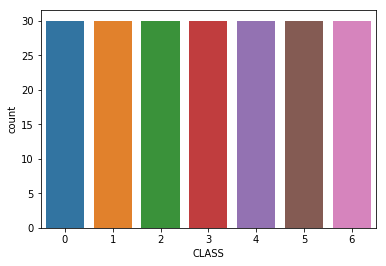

In [6]:
import seaborn as sns
sns.countplot(images['CLASS'],label="Count")
plt.show()

In [7]:
print (images.describe())

       REGION-CENTROID-COL  REGION-CENTROID-ROW  REGION-PIXEL-COUNT  \
count           210.000000           210.000000               210.0   
mean            124.647619           122.757143                 9.0   
std              74.104024            58.139686                 0.0   
min               1.000000            11.000000                 9.0   
25%              60.500000            81.500000                 9.0   
50%             123.500000           121.500000                 9.0   
75%             189.750000           174.500000                 9.0   
max             252.000000           250.000000                 9.0   

       SHORT-LINE-DENSITY-5  SHORT-LINE-DENSITY-2  VEDGE-MEAN    VEDGE-SD  \
count            210.000000            210.000000  210.000000  210.000000   
mean               0.008466              0.006349    1.925132    5.719529   
std                0.029549              0.030077    3.158211   43.495942   
min                0.000000              0.000000   

In [8]:
feature_names = list(images.columns.values)
feature_names.remove('CLASS')
feature_names.remove('REGION-PIXEL-COUNT')
X = images[feature_names]
y = images['CLASS']
print(feature_names)


['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


### Create Training and Test Sets and Apply Scaling

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Test Out Different methods

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.87
Accuracy of Logistic regression classifier on test set: 0.87


C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.96


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,  leaf_size=20, p=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.96


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.91
Accuracy of LDA classifier on test set: 0.89


C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.84
Accuracy of GNB classifier on test set: 0.70


In [15]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.54
Accuracy of SVM classifier on test set: 0.55


C:\Users\Matthew.Fry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01,max_depth=4, random_state=0,
                                 min_samples_split = 22, max_features = "sqrt" ,subsample = 0.8).fit(X_train, y_train)
print('Accuracy of GBC classifier on training set: {:.2f}'
     .format(gbc.score(X_train, y_train)))
print('Accuracy of GBC classifier on test set: {:.2f}'
     .format(gbc.score(X_test, y_test)))

Accuracy of GBC classifier on training set: 0.99
Accuracy of GBC classifier on test set: 0.96


In [101]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01,max_depth=5,random_state=0,loss='ls').fit(X_train, y_train)
print('Accuracy of GBr classifier on training set: {:.2f}'
     .format(gbr.score(X_train, y_train)))
print('Accuracy of GBr classifier on test set: {:.2f}'
     .format(gbr.score(X_test, y_test)))

Accuracy of GBr classifier on training set: 1.00
Accuracy of GBr classifier on test set: 0.69


GradientBoostingClassifier is looking the best. I tuned the parameters a bit.

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gbc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[5 0 1 0 0 0 1]
 [0 9 0 0 0 0 0]
 [0 0 8 0 0 0 0]
 [0 0 0 8 0 0 0]
 [0 0 0 0 7 0 0]
 [0 0 0 0 0 9 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      1.00      1.00         9
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       0.83      1.00      0.91         5

   micro avg       0.96      0.96      0.96        53
   macro avg       0.96      0.96      0.95        53
weighted avg       0.97      0.96      0.96        53



### Now to appply the model to the data for submission

In [91]:
trained_model=gbc.fit(X_train, y_train)
images_sub = pd.read_csv('test.csv')
X_sub = images_sub[feature_names]
X_sub = scaler.transform(X_sub)
result_matrix=trained_model.predict(X_sub)
y_sub=images_sub['id']
trained_model.predict_proba(X_sub)

array([[0.21265895, 0.2114    , 0.35239562, ..., 0.05300628, 0.0546793 ,
        0.06279985],
       [0.07541051, 0.10173399, 0.05533516, ..., 0.45880421, 0.05365672,
        0.20626593],
       [0.02317992, 0.01995377, 0.02157257, ..., 0.02152242, 0.01559151,
        0.037654  ],
       ...,
       [0.03040993, 0.01940438, 0.01749113, ..., 0.01765193, 0.01743912,
        0.06849361],
       [0.03162687, 0.02139624, 0.01906975, ..., 0.0186799 , 0.86031689,
        0.03139814],
       [0.02158513, 0.02101036, 0.01933434, ..., 0.86113104, 0.01852112,
        0.0398913 ]])

In [93]:
Submission=pd.DataFrame(trained_model.predict_proba(X_sub))
#Submission=Submission.assign(id=y_sub)
Submission.columns=["CLASS_0","CLASS_1","CLASS_2","CLASS_3","CLASS_4","CLASS_5","CLASS_6"]
Submission.head()
Submission.to_csv('solution2a.csv')